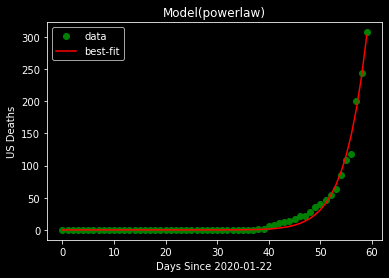

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from lmfit import models

# Choose a set of dataframes
pickle_name = 'df_us'

# Choose a data type
df_type = 'deaths'

# Import the dataframe
pickle_file = open(f'../output/pickles/{pickle_name}''.p', 'rb')
df= pickle.load(pickle_file)[df_type]
pickle_file.close()

# Model. See https://lmfit.github.io/lmfit-py/builtin_models.html
model = models.PowerLawModel()
df = df.groupby('day').sum().reset_index()
df = df[['day', 'cases']]
params = model.make_params()
result = model.fit(df.cases, params, x=df.day.to_list())
mpl.style.use('dark_background')
result.plot_fit(xlabel='Days Since 2020-01-22', ylabel='US Deaths', datafmt='og', fitfmt='r')